In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow keras


In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (0 to 255 → 0 to 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to include channel info (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# ✅ Add this exactly here: one-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check shape (optional)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9147 - loss: 0.2846 - val_accuracy: 0.9873 - val_loss: 0.0432
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9871 - loss: 0.0419 - val_accuracy: 0.9865 - val_loss: 0.0462
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9911 - loss: 0.0299 - val_accuracy: 0.9919 - val_loss: 0.0265
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9942 - loss: 0.0167 - val_accuracy: 0.9898 - val_loss: 0.0325
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9963 - loss: 0.0133 - val_accuracy: 0.9885 - val_loss: 0.0385


In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", round(test_loss, 4))
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9859 - loss: 0.0497
Test Loss: 0.0385
Test Accuracy: 98.85 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


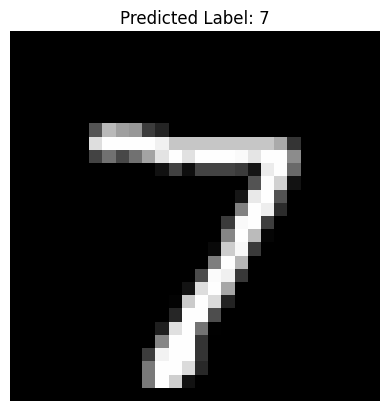

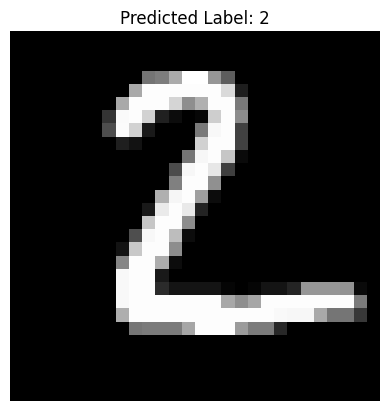

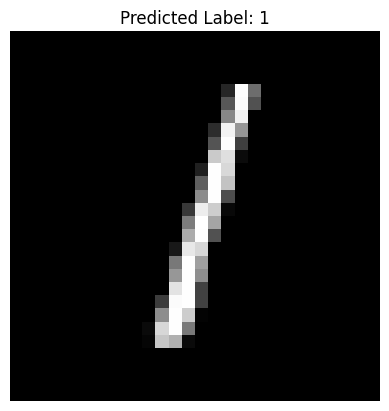

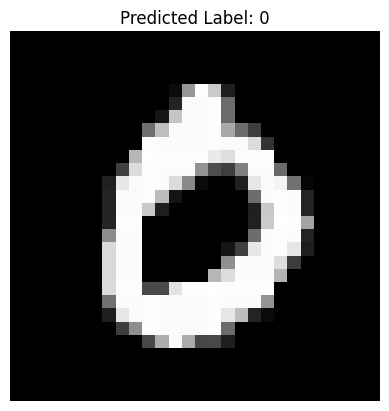

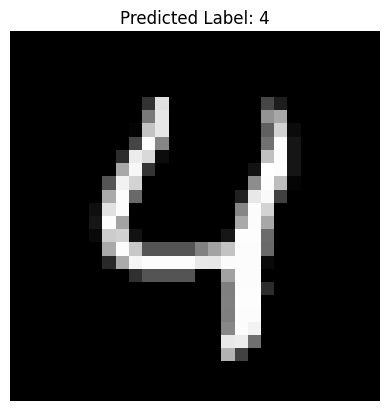

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(x_test[:5])

# Show the first 5 test images and predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


In [10]:
model.save("mnist_model.h5")


In [11]:
from google.colab import files
files.download('mnist_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>